In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')
df_copy = df.copy()
df_copy['job_posted_date'] = pd.to_datetime(df_copy['job_posted_date'])

df_copy['job_posted_month']= df_copy['job_posted_date'].dt.strftime('%B')
df_copy = df_copy[df_copy['job_country'] == 'United States']
df_copy_get = df_copy.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_copy_get.reset_index(inplace=True)
df_copy_get['month_no'] = pd.to_datetime(df_copy_get['job_posted_month'],format='%B').dt.month

df_copy_get.sort_values('month_no',inplace=True)
df_copy_get.set_index('job_posted_month',inplace=True)
df_copy_get.drop(columns='month_no',inplace=True)
top_3 = df_copy['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()
df_copy_get[top_3].plot(kind='line')
plt.title('Job Demand United States')
plt.xlabel('2024')
plt.ylabel('Job Trending Posts')


,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122,13619,9827,5108,4348
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364,11456,9116,7298,4284
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692,11102,8178,5814,4159
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025,14037,9209,7232,4220
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969,12126,8864,6718,4980
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213,12003,8065,5902,4781
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663,11914,8061,6839,4344
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970,11571,8191,7413,4104
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499,14016,8447,6139,4094


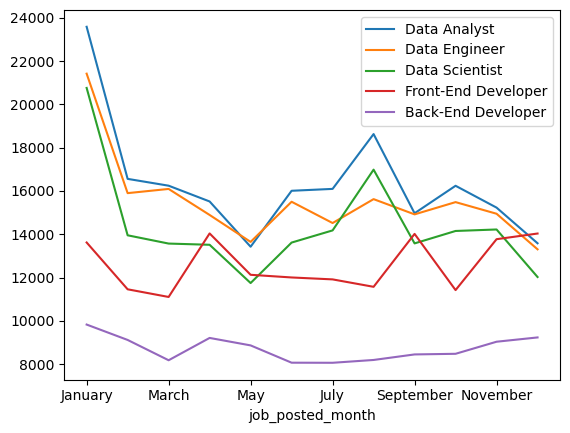

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')
df_copy = df.copy()
df_software = pd.read_csv('sftware_jobs.csv',index_col='job_posted_month')
df_copy['job_posted_date'] = pd.to_datetime(df_copy['job_posted_date'])

# df_copy = df_copy[df_copy['job_country'] == 'United State']
df_copy['job_posted_month'] = df_copy['job_posted_date'].dt.strftime('%B')
df_copy_pivot = df_copy.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_copy_pivot.reset_index(inplace=True)
df_copy_pivot['month_no'] = pd.to_datetime(df_copy_pivot['job_posted_month'],format='%B').dt.month
df_copy_pivot.sort_values('month_no',inplace=True)
df_copy_pivot.set_index('job_posted_month',inplace=True)
df_copy_pivot.drop(columns='month_no',inplace=True)
df_merge = df_copy_pivot.merge(df_software,on='job_posted_month')
top_5 = df_merge.sum().sort_values(ascending=False).head().index.to_list()
df_merge[top_5].plot(kind='line')

df_merge

<Axes: xlabel='job_posted_month'>

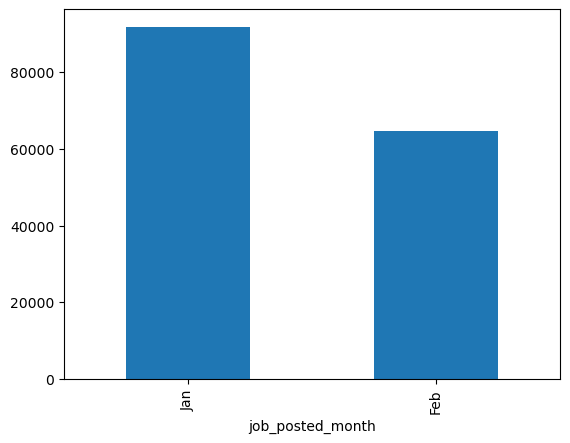

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')
df_copy = df.copy()
df_copy['job_posted_date'] = pd.to_datetime(df_copy['job_posted_date'])


df_copy['job_posted_month'] = df_copy['job_posted_date'].dt.strftime('%b')
months = df_copy['job_posted_month'].unique()

df_month = {month:df_copy[df_copy['job_posted_month'] == month] for month in months}

df_month_res = pd.concat([df_month['Jan'],df_month['Feb']],ignore_index=True)
df_month_res['job_posted_month'].value_counts().plot(kind='bar')

